In [15]:
import torch
from wilds import get_dataset
from torchvision.transforms import transforms, InterpolationMode
from sklearn.feature_selection import mutual_info_classif, r_regression, chi2
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scienceplots

In [2]:
def mutual_info_map(x, y):
    """
    estimates the mutual information maps for each class. That is, for each class, the mutual information between
    different locations on images (belonging to that class) and class label is estimated. This essentially measures
    how much individual parts of an image tells us about the class of the image
    :param dataset:
    :return:
    """
    # get the images and their labels
    x = x.flatten(start_dim=1)

    # starting getting the mutual information maps for the different images
    mi_map = np.zeros((max(y.unique()), w, h))

    for c in y.unique():
        mi_map[c] = mutual_info_classif(x.numpy(), (y == c).int()).reshape(w, h)
    
    mi_map = mi_map[y.unique()].mean(0)

    return mi_map

In [3]:
WILDS_ROOT_DIR = r"/storage/ice1/7/2/asharafeldin3"
def get_wilds_data(root_dir=WILDS_ROOT_DIR, frac=1.0):

    dataset = get_dataset(dataset="iwildcam", download=True, root_dir=root_dir)

    # Get the training set
    train_data = dataset.get_subset(
        "train",
        transform=transforms.Compose([transforms.Resize((20, 20), interpolation=InterpolationMode.BICUBIC),
                                      transforms.ToTensor()]),
        frac=frac
    )

    # Get the test set
    test_data = dataset.get_subset(
        "test",
        transform=transforms.Compose([transforms.Resize((20, 20), interpolation=InterpolationMode.BICUBIC),
                                      transforms.ToTensor()]),
    )
    
    return train_data, test_data

In [4]:
train_dataset, test_dataset = get_wilds_data()

In [5]:
train_loader = DataLoader(train_dataset, batch_size=1000)

In [6]:
x, y, _ = next(iter(train_loader))
x = x[:, 0]
_, w, h = x.shape

In [7]:
x = x.flatten(start_dim=1)

In [8]:
mi_map = np.zeros((max(y.unique())+1, w, h))

In [9]:
for c in y.unique():
    mi_map[c] = chi2(x.numpy(), (y == c).int())[0].reshape(w, h)

In [10]:
mi_map = mi_map[y.unique()].mean(0)

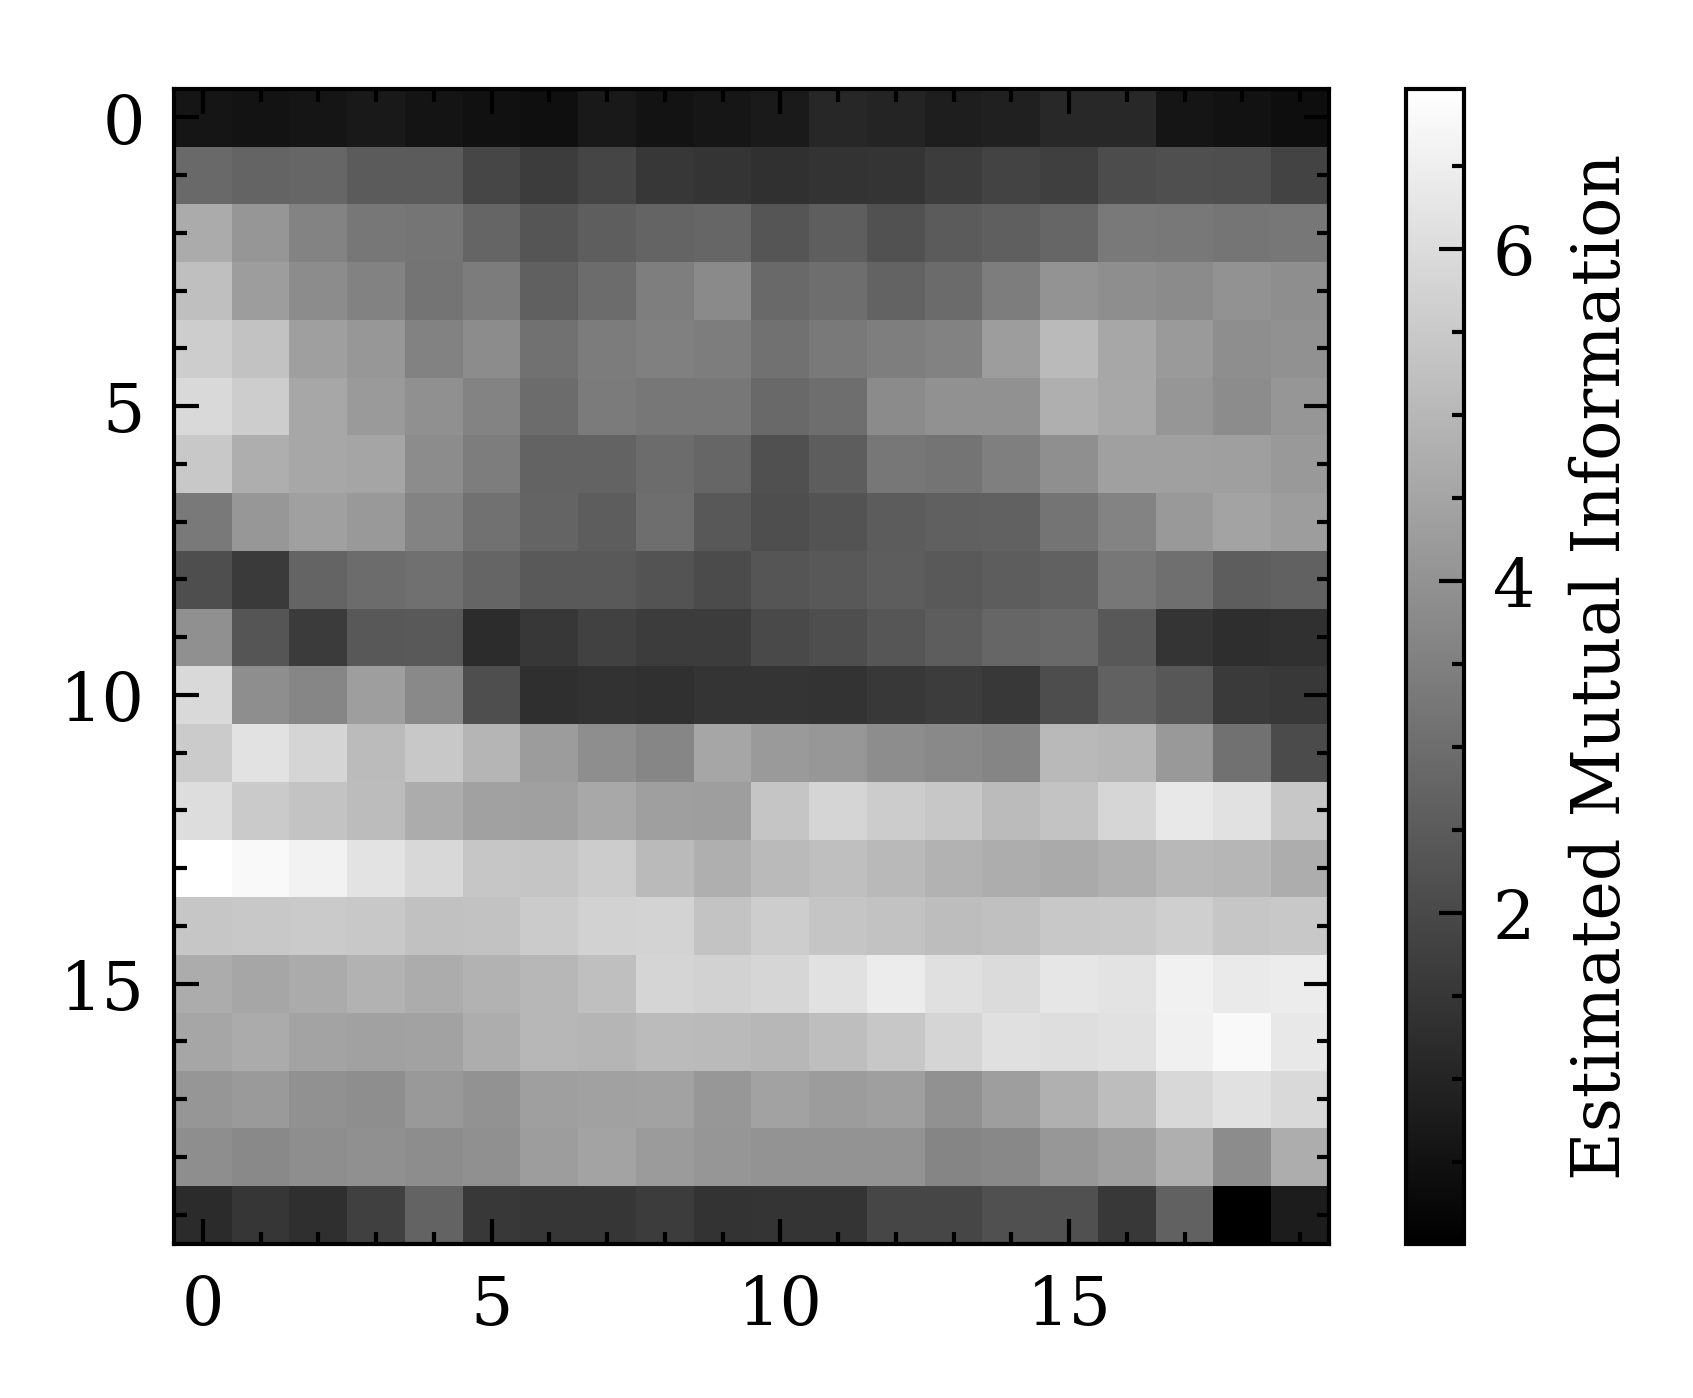

In [16]:
with plt.style.context(['science', 'ieee']):
    rc('text', usetex=False)
    im = plt.imshow(mi_map, 'gray')
    plt.colorbar(im, label='Estimated Mutual Information')